# 0. import Data

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
train = pd.read_csv ("/content/drive/My Drive/fdai-test/train.csv")
test = pd.read_csv ("/content/drive/My Drive/fdai-test/test.csv")
factory_metadata = pd.read_csv ("/content/drive/My Drive/fdai-test/factory_metadata.csv")
sample_submission = pd.read_csv ("/content/drive/My Drive/fdai-test/sample_submission.csv")
weather_info = pd.read_csv ("/content/drive/My Drive/fdai-test/weather_info.csv")

# 1. EDA

In [3]:
weather_info.head()

,location_id,timestamp,temperature,cloud,dewpoint,rain,pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [4]:
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   location_id     139773 non-null  int64  
 1   timestamp       139773 non-null  object 
 2   temperature     139718 non-null  float64
 3   cloud           70600 non-null   float64
 4   dewpoint        139660 non-null  float64
 5   rain            89484 non-null   float64
 6   pressure        129155 non-null  float64
 7   wind_direction  133505 non-null  float64
 8   wind_speed      139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
train.head()

,factory_id,timestamp,target
0,0,2016-01-01 00:00:00,0.0
1,1,2016-01-01 00:00:00,0.0
2,2,2016-01-01 00:00:00,0.0
3,3,2016-01-01 00:00:00,0.0
4,4,2016-01-01 00:00:00,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095340 entries, 0 to 9095339
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   factory_id  int64  
 1   timestamp   object 
 2   target      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 208.2+ MB


In [ ]:
factory_metadata.head()

,location_id,factory_id,usage,square_meter,year_built,floor_count
0,0,0,0,690,2008.0,NaN
1,0,1,0,252,2004.0,NaN
2,0,2,0,499,1991.0,NaN
3,0,3,0,2200,2002.0,NaN
4,0,4,0,10833,1975.0,NaN


In [ ]:
# 그룹 location_id 별로 facotry_id의 개수
grouped = factory_metadata['factory_id'].groupby(factory_metadata['location_id'])

grouped.size()

location_id
0     105
1      51
2     135
3     274
4      91
5      89
6      44
7      15
8      70
9     124
10     30
11      5
12     36
13    154
14    102
15    124
Name: factory_id, dtype: int64

In [ ]:
factory_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location_id   1449 non-null   int64  
 1   factory_id    1449 non-null   int64  
 2   usage         1449 non-null   int64  
 3   square_meter  1449 non-null   int64  
 4   year_built    675 non-null    float64
 5   floor_count   355 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 68.0 KB


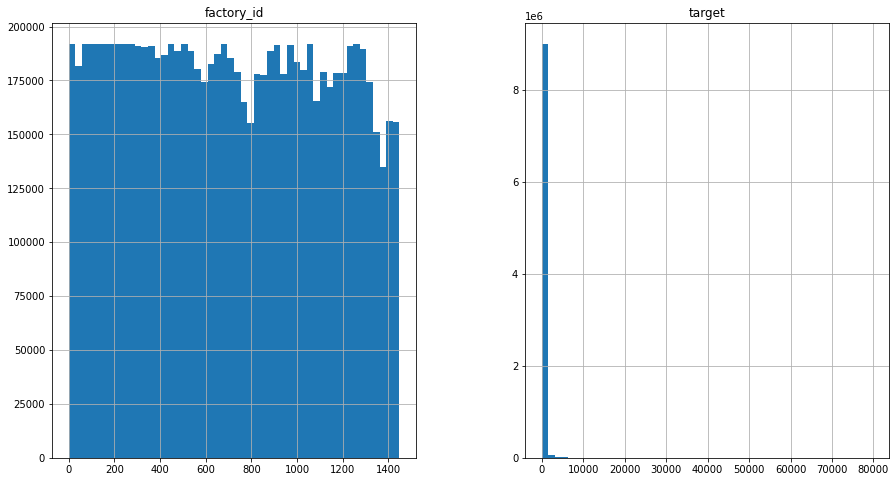

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(15,8))
plt.show()

In [5]:
train.isnull().sum()

factory_id    0
timestamp     0
target        0
dtype: int64

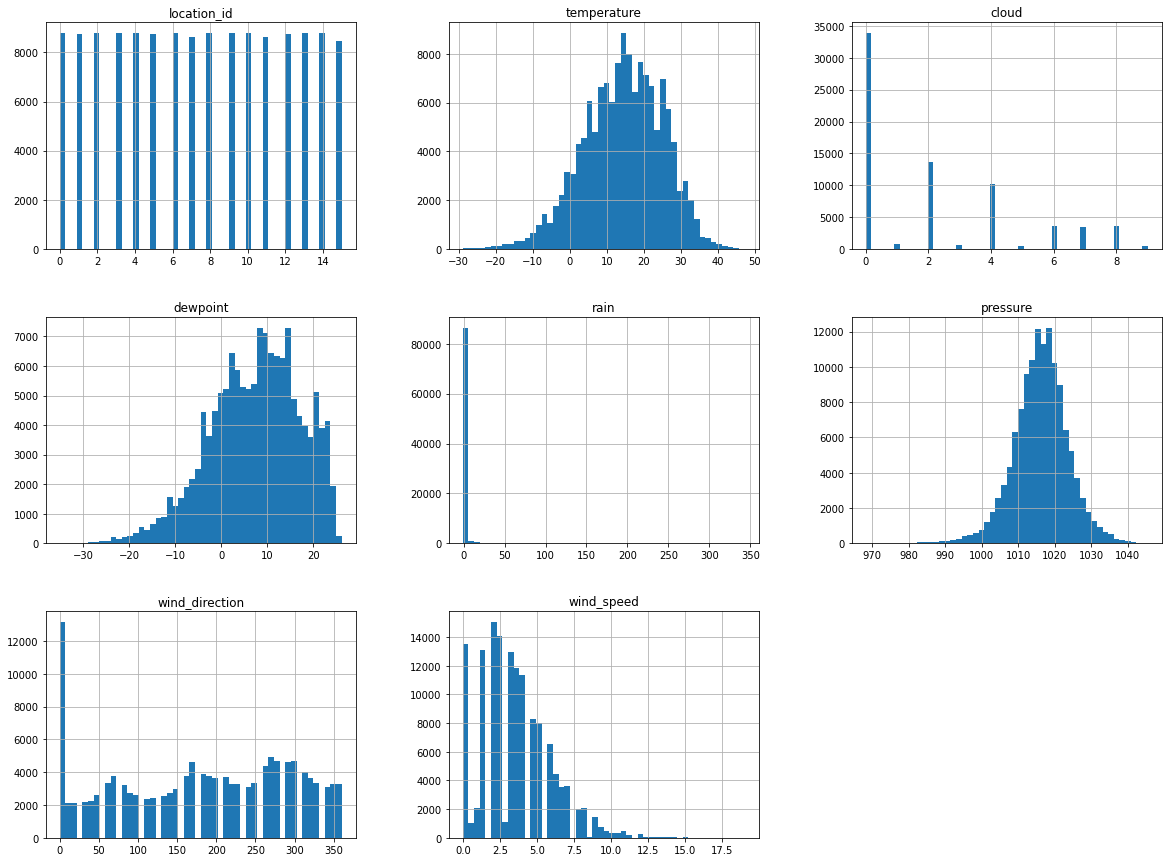

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
weather_info.hist(bins=50, figsize=(20,15))
plt.show()

In [57]:
len(weather_info)

139773

In [6]:
weather_info.isnull().sum()

location_id           0
timestamp             0
temperature          55
cloud             69173
dewpoint            113
rain              50289
pressure          10618
wind_direction     6268
wind_speed          304
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cbed55250>,
      dtype=object)

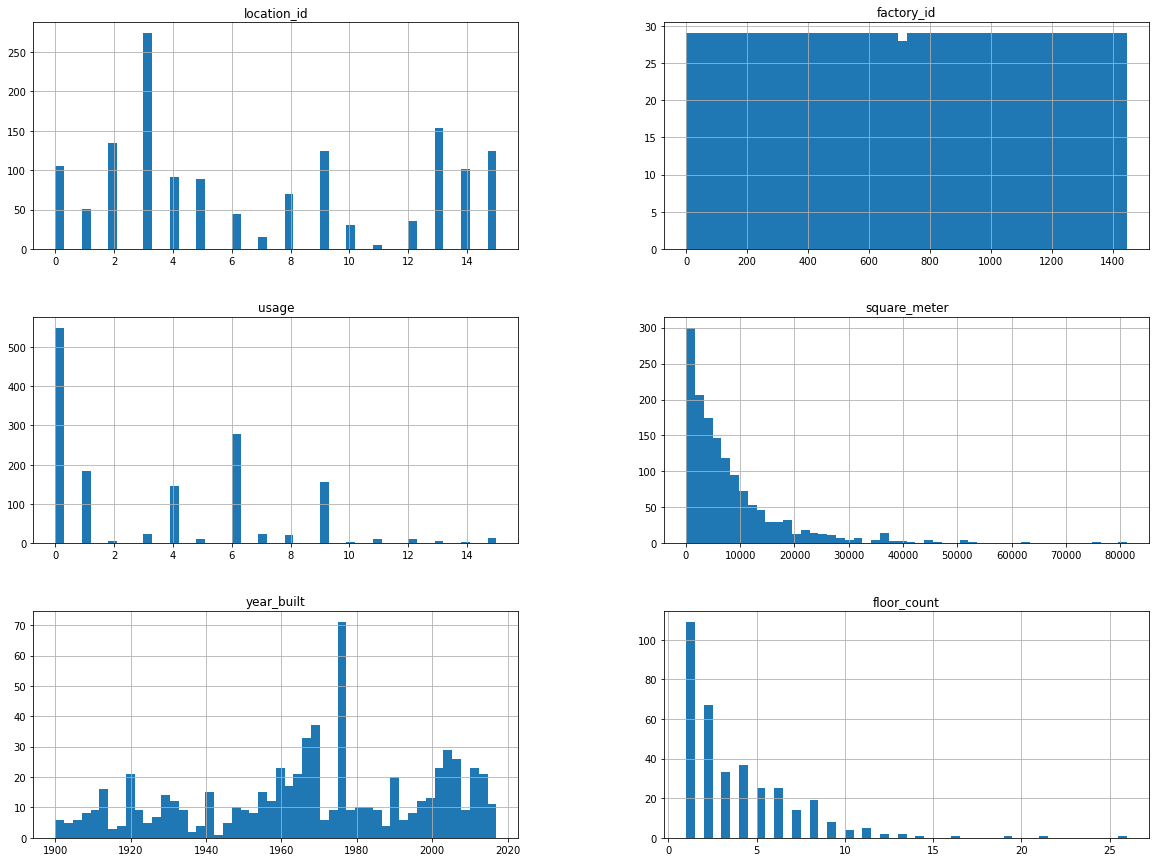

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
factory_metadata.hist(bins=50, figsize=(20,15))

In [64]:
import plotly.express as px
fig = px.line(train[train['factory_id']==150], x='timestamp', y='target', title='factory_id = 150')
fig.show()

# 2. Preprocessing

In [3]:
weather_info = weather_info.interpolate(method='values')  
weather_info.tail()

,location_id,timestamp,temperature,cloud,dewpoint,rain,pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,1.5,-8.0,-1.0,1007.55,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,-1.0,1007.40,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,2.0,-7.2,-1.0,1007.50,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,2.0,-6.7,-1.0,1008.00,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,2.0,-5.6,-1.0,1008.50,180.0,8.8


In [4]:
len(factory_metadata)

1449

In [10]:
factory_metadata.isnull().sum()

location_id        0
factory_id         0
usage              0
square_meter       0
year_built       774
floor_count     1094
dtype: int64

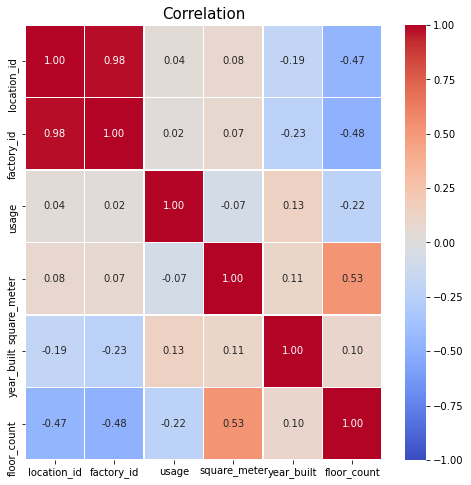

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = factory_metadata.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.show()

In [4]:
# 결측값을 회귀모형 추정값으로 채우기
from sklearn import linear_model 
lin_reg = linear_model.LinearRegression() 
# X and y after excluding missing values 
X = factory_metadata.dropna(axis=0)[['square_meter'] ]
y = factory_metadata.dropna(axis=0)['floor_count'] 
# fitting linear regression model using non-missing values 
lin_reg_model = lin_reg.fit(X, y)

# Prediction
y_pred = lin_reg_model.predict(factory_metadata.loc[:, ['square_meter']]) 
y_pred

array([3.13723317, 3.04316998, 3.09621475, ..., 3.21368635, 3.58306691,
       4.82994104])

In [5]:
## filling missing values using predicted values by a linear regression model  
import numpy as np

factory_metadata['floor_count'].fillna(pd.Series(np.round(y_pred).flatten()), inplace=True)

In [8]:
factory_metadata.isnull().sum()

location_id       0
factory_id        0
usage             0
square_meter      0
year_built      774
floor_count       0
dtype: int64

In [9]:
factory_metadata

,location_id,factory_id,usage,square_meter,year_built,floor_count
0,0,0,0,690,2008.0,3.0
1,0,1,0,252,2004.0,3.0
2,0,2,0,499,1991.0,3.0
3,0,3,0,2200,2002.0,3.0
4,0,4,0,10833,1975.0,5.0
...,...,...,...,...,...,...
1444,15,1444,1,1822,1914.0,3.0
1445,15,1445,0,399,NaN,3.0
1446,15,1446,1,1046,1997.0,3.0
1447,15,1447,4,2766,2001.0,4.0


In [58]:
# train 데이터와 factory_metadata 병합
train_merge = pd.merge(train,factory_metadata, how='left',on='factory_id')
train_merge.head()

,factory_id,timestamp,target,location_id,usage,square_meter,year_built,floor_count
0,0,2016-01-01 00:00:00,0.0,0,0,690,2008.0,NaN
1,1,2016-01-01 00:00:00,0.0,0,0,252,2004.0,NaN
2,2,2016-01-01 00:00:00,0.0,0,0,499,1991.0,NaN
3,3,2016-01-01 00:00:00,0.0,0,0,2200,2002.0,NaN
4,4,2016-01-01 00:00:00,0.0,0,0,10833,1975.0,NaN


In [59]:
# train_merge와 weather_info 병합
train_merge = pd.merge(train_merge, weather_info, how='left', on=['location_id','timestamp'])
train_merge.tail()

,factory_id,timestamp,target,location_id,usage,square_meter,year_built,floor_count,temperature,cloud,dewpoint,rain,pressure,wind_direction,wind_speed
9095335,1444,2016-12-23 23:00:00,10.525,15,1,1822,1914.0,NaN,1.1,0.0,-6.1,NaN,1027.8,140.0,3.1
9095336,1445,2016-12-23 23:00:00,4.925,15,0,399,NaN,NaN,1.1,0.0,-6.1,NaN,1027.8,140.0,3.1
9095337,1446,2016-12-23 23:00:00,0.000,15,1,1046,1997.0,NaN,1.1,0.0,-6.1,NaN,1027.8,140.0,3.1
9095338,1447,2016-12-23 23:00:00,150.325,15,4,2766,2001.0,NaN,1.1,0.0,-6.1,NaN,1027.8,140.0,3.1
9095339,1448,2016-12-23 23:00:00,3.125,15,6,8572,2001.0,NaN,1.1,0.0,-6.1,NaN,1027.8,140.0,3.1


In [11]:
train_merge["timestamp"]= pd.to_datetime(train_merge["timestamp"])
# 월, 일, 요일, 주말여부, 시간 추가
train_merge['month']=train_merge['timestamp'].apply(lambda x: x.month)
train_merge['day']=train_merge['timestamp'].apply(lambda x: x.day)

# 평일=0~4, 주말=5~6
train_merge['weekday']=train_merge['timestamp'].apply(lambda x :x.weekday())

# 평일=0, 주말=1
train_merge['weekend']=train_merge['weekday'].apply(lambda x: 0 if x < 4 else 1)

# 시간
train_merge['hour']=train_merge['timestamp'].apply(lambda x: x.hour)

In [13]:
train_merge.head()

,factory_id,timestamp,target,location_id,usage,square_meter,year_built,floor_count,temperature,cloud,dewpoint,rain,pressure,wind_direction,wind_speed,month,day,weekday,weekend,hour
0,0,2016-01-01,0.0,0,0,690,2008.0,3.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,1,0
1,1,2016-01-01,0.0,0,0,252,2004.0,3.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,1,0
2,2,2016-01-01,0.0,0,0,499,1991.0,3.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,1,0
3,3,2016-01-01,0.0,0,0,2200,2002.0,3.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,1,0
4,4,2016-01-01,0.0,0,0,10833,1975.0,5.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,1,0


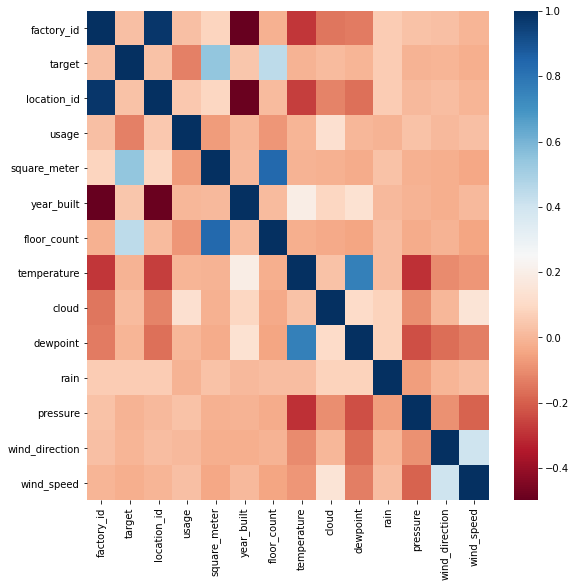

In [49]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train_merge.corr()
sns.heatmap(corr, cmap='RdBu')

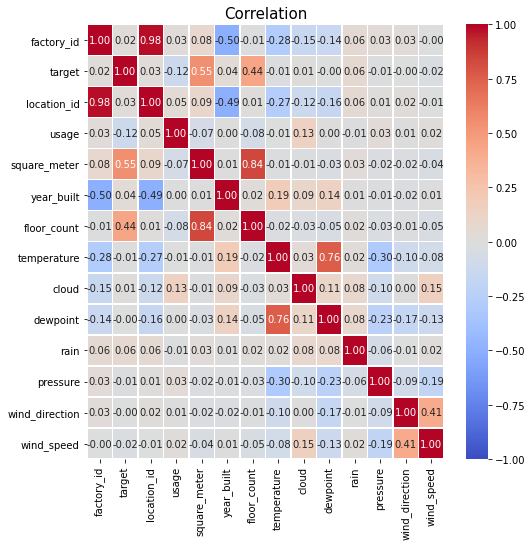

In [50]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = train_merge.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.show()

In [14]:
train_merge.drop(['timestamp','location_id'], axis=1, inplace=True) # 학습에 불필요한 날짜 제거

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_merge = scaler.fit_transform(train_merge) #값을 0~1로 떨어뜨린다

In [16]:
train_merge

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-01, 1.00000000e+00, 0.00000000e+00],
       [6.90607735e-04, 0.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-01, 1.00000000e+00, 0.00000000e+00],
       [1.38121547e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98618785e-01, 0.00000000e+00, 6.66666667e-02, ...,
        6.66666667e-01, 1.00000000e+00, 1.00000000e+00],
       [9.99309392e-01, 1.88450401e-03, 2.66666667e-01, ...,
        6.66666667e-01, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.91756196e-05, 4.00000000e-01, ...,
        6.66666667e-01, 1.00000000e+00, 1.00000000e+00]])

In [17]:
train_x=pd.DataFrame(train_merge).drop(1, axis=1)
train_y=pd.DataFrame(train_merge[:,1])

In [18]:
len(train_y)

9095340

# 3. 학습 모델링

LGBM1

In [22]:
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

cross=KFold(n_splits=4, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in cross.split(train_x, train_y):
    folds.append((train_idx, valid_idx))

In [20]:
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [23]:
models={}
for fold in range(4):
    print(f'===================={fold+1}=======================')
    train_idx, valid_idx=folds[fold]
    X_train=train_x.iloc[train_idx, :]
    y_train=train_y.iloc[train_idx, :]
    X_valid=train_x.iloc[valid_idx, :]
    y_valid=train_y.iloc[valid_idx, :]
    
    model=LGBMRegressor(n_estimators=3000, max_depth=10)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
             early_stopping_rounds=30, verbose=100, eval_metric=rmsle)
    models[fold]=model
    
    print(f'================================================\n\n')
# 약 2시간 걸림
# training's l2: 2894.25	valid_1's l2: 2815.46
# training's l2: 3379.23	valid_1's l2: 3099.35
# training's l2: 2139.48	valid_1's l2: 7165.89
# training's l2: 3235.5	valid_1's l2: 2498.15
# training's l2: 3048.28	valid_1's l2: 3116.51

====================1=======================
Training until validation scores don't improve for 30 rounds.
[10]	training's l2: 7.7281e-06	training's RMSLE: 0.00269222	valid_1's l2: 7.55113e-06	valid_1's RMSLE: 0.00267651
[20]	training's l2: 4.59609e-06	training's RMSLE: 0.00207379	valid_1's l2: 4.4183e-06	valid_1's RMSLE: 0.00205284
[30]	training's l2: 3.5758e-06	training's RMSLE: 0.00182662	valid_1's l2: 3.39949e-06	valid_1's RMSLE: 0.00180304
[40]	training's l2: 3.11095e-06	training's RMSLE: 0.00170195	valid_1's l2: 2.93843e-06	valid_1's RMSLE: 0.00167761
[50]	training's l2: 2.80313e-06	training's RMSLE: 0.0016129	valid_1's l2: 2.63444e-06	valid_1's RMSLE: 0.00158834
[60]	training's l2: 2.59306e-06	training's RMSLE: 0.00154823	valid_1's l2: 2.42713e-06	valid_1's RMSLE: 0.00152348
[70]	training's l2: 2.41505e-06	training's RMSLE: 0.00149145	valid_1's l2: 2.25067e-06	valid_1's RMSLE: 0.00146624
[80]	training's l2: 2.29126e-06	training's RMSLE: 0.00145057	valid_1's l2: 2.12841e-06	valid

In [26]:
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
# test셋 전처리
# test 데이터와 factory_metadata 병합
test_merge = pd.merge(test,factory_metadata, how='left',on='factory_id')
# test_merge weather_info 병합
test_merge = pd.merge(test_merge, weather_info, how='left', on=['location_id','timestamp'])

test_merge["timestamp"]= pd.to_datetime(test_merge["timestamp"])
# 월, 일, 요일, 주말여부, 시간 추가
test_merge['month']=test_merge['timestamp'].apply(lambda x: x.month)
test_merge['day']=test_merge['timestamp'].apply(lambda x: x.day)

# 평일=0~4, 주말=5~6
test_merge['weekday']=test_merge['timestamp'].apply(lambda x :x.weekday())

# 평일=0, 주말=1
test_merge['weekend']=test_merge['weekday'].apply(lambda x: 0 if x < 4 else 1)

# 시간
test_merge['hour']=test_merge['timestamp'].apply(lambda x: x.hour)

test_merge.drop(['timestamp','location_id'], axis=1, inplace=True)

In [41]:
test_merge.head()

,factory_id,usage,square_meter,year_built,floor_count,temperature,cloud,dewpoint,rain,pressure,wind_direction,wind_speed,month,day,weekday,weekend,hour
0,0,0,690,2008.0,3.0,7.2,2.0,1.7,0.0,1014.3,270.0,7.7,1,24,6,1,0
1,1,0,252,2004.0,3.0,7.2,2.0,1.7,0.0,1014.3,270.0,7.7,1,24,6,1,0
2,2,0,499,1991.0,3.0,7.2,2.0,1.7,0.0,1014.3,270.0,7.7,1,24,6,1,0
3,3,0,2200,2002.0,3.0,7.2,2.0,1.7,0.0,1014.3,270.0,7.7,1,24,6,1,0
4,4,0,10833,1975.0,5.0,7.2,2.0,1.7,0.0,1014.3,270.0,7.7,1,24,6,1,0


In [27]:
test_x = scaler.fit_transform(test_merge) #값을 0~1로 떨어뜨린다
test_x = pd.DataFrame(test_x)
test_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.000000,0.008171,0.923077,0.08,0.400966,0.222222,0.48954,0.002907,0.548480,0.75,0.416216,0.0,0.0,1.000000,1.0,0.0
1,0.000691,0.000000,0.002781,0.888889,0.08,0.400966,0.222222,0.48954,0.002907,0.548480,0.75,0.416216,0.0,0.0,1.000000,1.0,0.0
2,0.001381,0.000000,0.005821,0.777778,0.08,0.400966,0.222222,0.48954,0.002907,0.548480,0.75,0.416216,0.0,0.0,1.000000,1.0,0.0
3,0.002072,0.000000,0.026753,0.871795,0.08,0.400966,0.222222,0.48954,0.002907,0.548480,0.75,0.416216,0.0,0.0,1.000000,1.0,0.0
4,0.002762,0.000000,0.132988,0.641026,0.16,0.400966,0.222222,0.48954,0.002907,0.548480,0.75,0.416216,0.0,0.0,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965565,0.997238,0.066667,0.022101,0.119658,0.08,0.312399,0.222222,0.33682,0.000000,0.464544,0.50,0.475676,1.0,1.0,0.833333,1.0,1.0
2965566,0.997928,0.000000,0.004590,NaN,0.08,0.312399,0.222222,0.33682,0.000000,0.464544,0.50,0.475676,1.0,1.0,0.833333,1.0,1.0
2965567,0.998619,0.066667,0.012552,0.829060,0.08,0.312399,0.222222,0.33682,0.000000,0.464544,0.50,0.475676,1.0,1.0,0.833333,1.0,1.0
2965568,0.999309,0.266667,0.033718,0.863248,0.12,0.312399,0.222222,0.33682,0.000000,0.464544,0.50,0.475676,1.0,1.0,0.833333,1.0,1.0


# 4. test 데이터 예측

In [29]:
for i in range(4):
    sample_submission['target'] += models[i].predict(test_x)/4

In [33]:
sample_submission

,sample_id,target
0,0,0.000316
1,1,0.000276
2,2,0.000035
3,3,0.000537
4,4,-0.000087
...,...,...
2965565,2965565,0.000135
2965566,2965566,-0.000004
2965567,2965567,0.000011
2965568,2965568,0.004569


In [49]:
np.array(sample_submission['target'])

array([ 3.15612305e-04,  2.75872378e-04,  3.49820195e-05, ...,
        1.08570192e-05,  4.56908268e-03, -5.53576431e-04])

In [43]:
scaler.min_, scaler.scale_, scaler.data_min_, scaler.data_max_

(array([ 0.00000000e+00,  0.00000000e+00, -3.19948808e-04, -1.62393162e+01,
        -4.00000000e-02,  2.85024155e-01,  0.00000000e+00,  4.53974895e-01,
         2.90697674e-03, -1.41302460e+01,  0.00000000e+00,  0.00000000e+00,
        -9.09090909e-02, -3.42857143e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]),
 array([6.90607735e-04, 6.66666667e-02, 1.23057234e-05, 8.54700855e-03,
        4.00000000e-02, 1.61030596e-02, 1.11111111e-01, 2.09205021e-02,
        2.90697674e-03, 1.44717800e-02, 2.77777778e-03, 5.40540541e-02,
        9.09090909e-02, 1.42857143e-01, 1.66666667e-01, 1.00000000e+00,
        4.34782609e-02]),
 array([ 0.000e+00,  0.000e+00,  2.600e+01,  1.900e+03,  1.000e+00,
        -1.770e+01,  0.000e+00, -2.170e+01, -1.000e+00,  9.764e+02,
         0.000e+00,  0.000e+00,  1.000e+00,  2.400e+01,  0.000e+00,
         0.000e+00,  0.000e+00]),
 array([1.4480e+03, 1.5000e+01, 8.1289e+04, 2.0170e+03, 2.6000e+01,
        4.4400e+01, 9.0000e+00, 2.6100e+01, 3.430

In [44]:
scale=preprocessing.MinMaxScaler()
scale.min_, scale.scale_=scaler.min_[0],scaler.scale_[0]

In [54]:
test_y = scale.inverse_transform(np.array(sample_submission['target']).reshape(-1,1))
sample_submission['target'] = np.where(test_y <0, 0, test_y)
sample_submission

,sample_id,target
0,0,0.457007
1,1,0.399463
2,2,0.050654
3,3,0.778234
4,4,0.000000
...,...,...
2965565,2965565,0.195715
2965566,2965566,0.000000
2965567,2965567,0.015721
2965568,2965568,6.616032


In [55]:
#제출
sample_submission.to_csv('/content/drive/My Drive/fdai-test/baseline_lgbm3.csv', index=False)

LGBM2

In [ ]:
from lightgbm import LGBMRegressor  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=156)
X_train.head(1)

,factory_id,location_id,usage,square_meter,year_built,floor_count,month,day,weekday,weekend,hour
6584104,1087,13,6,5255,NaN,NaN,9,17,5,1,10


In [ ]:
y_train.head(1)

,target
6584104,21.182


In [ ]:
from sklearn.metrics import make_scorer
import numpy as np  # 넘파이
  
def rmsle(predicted_values, actual_values):
	# 넘파이로 배열 형태로 바꿔줌.  
  predicted_values = np.array(predicted_values)
  actual_values = np.array(actual_values)
    
  # 예측값과 실제 값에 1을 더하고 로그를 씌어줌 
  log_predict = np.log(predicted_values + 1)
  log_actual = np.log(actual_values + 1)
    
  # 위에서 계산한 예측값에서 실측값을 빼주고 제곱해줌
  difference = log_predict - log_actual
  difference = np.square(difference)
    
  # 평균을 냄
  mean_difference = difference.mean()
    
  # 다시 루트를 씌움
  score = np.sqrt(mean_difference)  
    
  return score
rmsle_scorer = make_scorer(rmsle)

In [ ]:
# 파라미터 설정, 모델생성 함수
def get_best_params(model, params):
    grid_model = GridSearchCV(
        model,
        param_grid = params,  # 파라미터
        cv=5,  # Kfold : 5
        scoring= rmsle_scorer)  #loss function

    grid_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100)
    scr = grid_model.best_score_
    print(f'{model.__class__.__name__} 최적 score 값 {scr}')
    return grid_model.best_estimator_

In [ ]:
# 파라미터 후보군 설정
# 어떤 파라미터로 하는게 좋을지 고민된다면 고민하는 것들을 리스트 안에 다 넣어보세요 알아서 골라줄겁니다.
# 저는 예시로 learning_rate만 0.1 or 0.01 중 더 좋은걸 골라달라고 했습니다.
params = {}
params['boosting_type'] = ['gbdt']
params['objective'] = ['regression']
params['n_estimators'] = [100]
params['learning_rate'] = [0.1, 0.01]  
params['subsample'] = [1]

In [ ]:
# 모델정의
model=LGBMRegressor(params)

In [ ]:
# 학습진행
best_lgbm = get_best_params(model, params)
best_lgbm  # learning_rate 0.1 or 0.01 중, 0.01이 더 좋았다고 하는군요. 

[100]	valid_0's l2: 12859.9	valid_1's l2: 12483.2


In [ ]:
# 기타 지표로 에러 측정
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_lgbm.predict(X_train)

mse_score = mean_squared_error(y_train, y_pred)
r2_score = r2_score(y_train, y_pred)
print('MSE:', mse_score)
print('R2 :', r2_score)

In [ ]:
# 모델저장, 로드
from sklearn.externals import joblib
joblib.dump(best_lgbm, 'best_lgbm.pkl')
load_lgbm = joblib.load('best_lgbm.pkl')

In [ ]:
# 모델에 넣기 위해 날짜칼럼 제거
test_x = test.drop('date_time', axis=1)

In [ ]:
# 모델 예측
submission_y = best_lgbm.predict(test_x)

In [ ]:
# submission.csv 생성
test['answer'] = submission_y
test['num_date_time'] = test.apply(lambda x: str(x['num']) +' '+ x['date_time'], axis=1)
submission = test[['num_date_time', 'answer']]
submission.to_csv('submission.csv', index=False)
submission